### Analysis of the Seattle Airbnb dataset from Kaggle

#### Questions to answer 
* 1. What's the range of prices per night for properties in Seattle?

* 2. Assess the seasonal variation of prices (variation in prices accross months)

* 3. Can we visualize patterns in prices associated to neighbourhoods?

* 4. Which neighbourhoods have more listings, and which ones are most expensive?

* 5. Which is the difference in price when travelling solo vs. in small/big groups?

* 6. Which factors seem to be related to property price?

In [50]:
import pandas as pd
import numpy as np
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Load input data
Let's look at files available in the input data folder

In [51]:
root_path = (Path(".")).resolve()
sys.path.append(str(root_path.resolve()))
data_path = root_path / "data" / "raw"
data_files = list(data_path.glob("*.*"))
list(x.name for x in sorted(data_files, key=lambda x: x.stem))

['.gitkeep', 'calendar.csv', 'listings.csv', 'reviews.csv']

In [52]:
# Load data files
calendar_df = pd.read_csv(data_path / "calendar.csv")
listings_df = pd.read_csv(data_path / "listings.csv")
reviews_df = pd.read_csv(data_path / "reviews.csv")

**`1.` What's the range of prices per night for properties in Seattle??**

To answer this question we will look at the data in `calendar_csv`. 
First, let's take a look at the dataset

In [53]:
calendar_df.head(20)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [54]:
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

The price column contains strings. Convert this column to float to allow for quantitative analyses. Similarly, convert the date column to a datetime object.

In [55]:
calendar_df['price']= calendar_df['price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['year'] = calendar_df['date'].dt.year

calendar_df.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.0,1,2016
1,241032,2016-01-05,t,85.0,1,2016
2,241032,2016-01-06,f,NaN,1,2016
3,241032,2016-01-07,f,NaN,1,2016
4,241032,2016-01-08,f,NaN,1,2016


Calculate descriptive statistics and plot distribution of prices accross listed properties

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64


Text(0.5, 1.0, 'Average price per night')

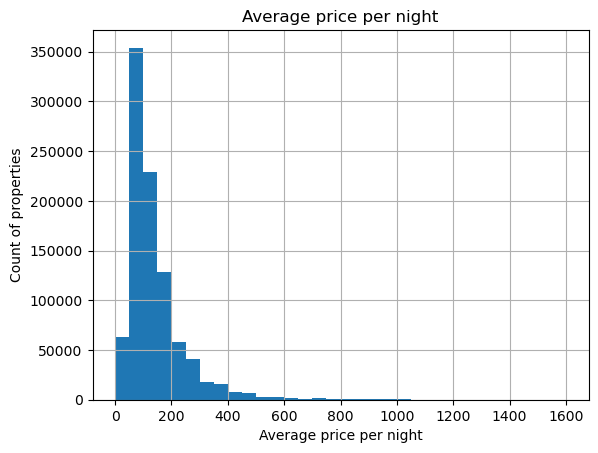

In [56]:
print(calendar_df['price'].describe())
calendar_df['price'].hist(bins = np.arange(0,1650,50))
plt.xlabel("Average price per night")
plt.ylabel("Count of properties")
plt.title("Average price per night")

In [57]:
mean_price_by_month = calendar_df.groupby('month')["price"].describe()
mean_price_by_month

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,64937.0,122.912176,88.708143,12.0,70.0,99.0,148.0,1000.0
2,73321.0,124.293927,91.550076,20.0,72.0,100.0,149.0,1000.0
3,83938.0,128.644488,94.371410,20.0,75.0,100.0,150.0,1099.0
4,76037.0,135.097005,98.232098,20.0,75.0,110.0,160.0,1099.0
5,79971.0,139.538183,102.863280,20.0,75.0,110.0,169.0,1099.0
6,77244.0,147.473137,112.481803,20.0,76.0,110.0,175.0,1099.0
7,74222.0,152.094150,120.078098,20.0,75.0,115.0,180.0,1240.0
8,76347.0,150.656594,118.754189,20.0,75.0,114.0,179.0,1250.0
9,77246.0,143.255949,108.804290,20.0,75.0,110.0,175.0,1450.0


**`2.` Assess the seasonal variation of prices (variation in prices accross months)**

To answer this question we will create a boxplot representing prices for each month to see the temporal variation

Text(0, 0.5, 'Price per night($)')

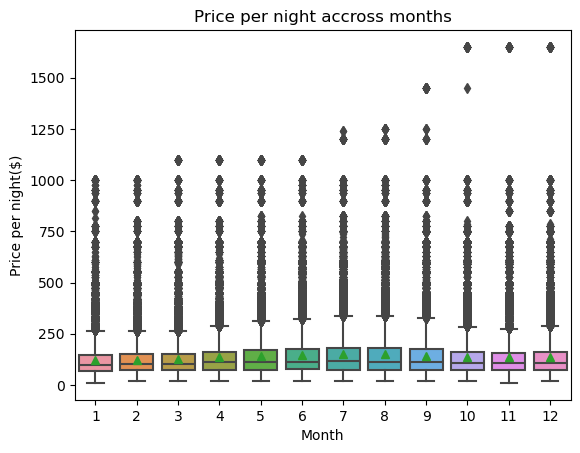

In [58]:
ax = sns.boxplot(x = "month", y = "price", data = calendar_df, showmeans=True)
plt.title("Price per night accross months")
plt.xlabel("Month")
plt.ylabel("Price per night($)")


Some of the values are determined to be outliers (shown outside the wiskers in the plot). We exclude these values in the next plot to allow for a better visual assessment. The visual assessment shows an increase in  mean prices (green squares) accross listed properties over the summer months: 6-9 (June-September) 

Text(0, 0.5, 'Price per night($)')

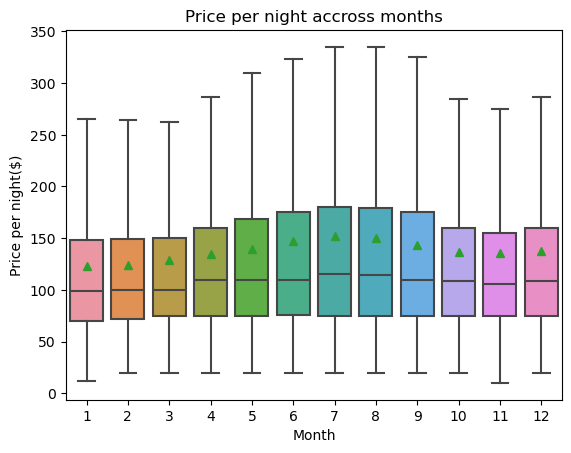

In [59]:
ax = sns.boxplot(x = "month", y = "price", data = calendar_df, showfliers = False, showmeans=True)
plt.title("Price per night accross months")
plt.xlabel("Month")
plt.ylabel("Price per night($)")

**`3.` Can we visualize patterns in prices associated to neighbourhoods?**

To investigate this we'll look at the `listings` dataset. Let's start by looking at the variables included in this dataset

In [60]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

We select the variables we are interested in for the analysis

In [61]:
COLUMNS_OF_INTEREST = ['id', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview','host_is_superhost',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'city', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews','review_scores_rating',
       'review_scores_accuracy','review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license']

listings_selected_columns_df = listings_df[COLUMNS_OF_INTEREST]

In [ ]:
listings_selected_columns_df['price'] = listings_selected_columns_df['price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

Let's take a look first at the distribution of guests included, to have some insight on which values we can expect,
We can see that most properties are for one or two guests

count    3818.000000
mean        1.672603
std         1.311040
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: guests_included, dtype: float64


Text(0.5, 1.0, 'Guests included')

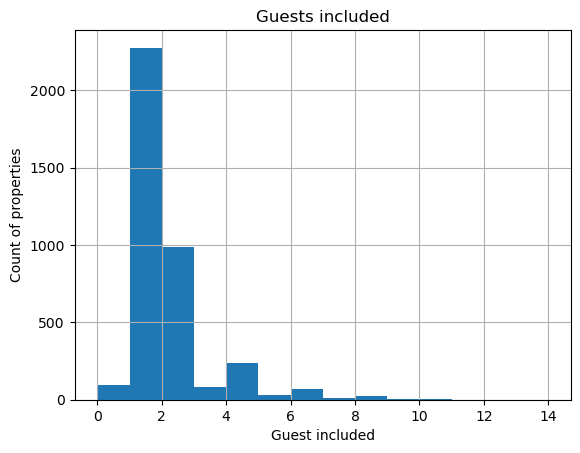

In [63]:
print(listings_selected_columns_df["guests_included"].describe())
listings_selected_columns_df["guests_included"].hist(bins = np.arange(0,15,1))
plt.xlabel("Guest included")
plt.ylabel("Count of properties")
plt.title("Guests included")

We create a scatterplot overlaid onto a Seattle map where each dot represents a property, the color represents the price, and the size of the dot represents the number of guests allowed. Intuitively, one might think that think that properties for a larger numer of guests will generally be more expensive. We can try to visually pinpoint properties with high price and a small size, or high price in generall, and identify which neighbourhoods can be expensive

In [64]:

fig = px.scatter_mapbox(listings_selected_columns_df, lat="latitude", lon="longitude", hover_name="neighbourhood", hover_data=["price", "guests_included"],
                        color="price", size="guests_included", zoom = 3, height=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We can visually identify expensive properties, even for a small number of guests, in areas like Queen Anne or Alki. Hovering over the dots provides information on the neighbourhood, price and number of guests.

**`4.` Which neighbourhoods have the most listings, and which ones are the most expensive?**

To investigate this we'll continue looking at the `listings` dataset, and doing quantivative analysis on listed properties and prices. Let's start by looking at neighbourhoods with the largest number of listed properties

Text(0.5, 1.0, 'Ten neighbourhoods with most listed properties')

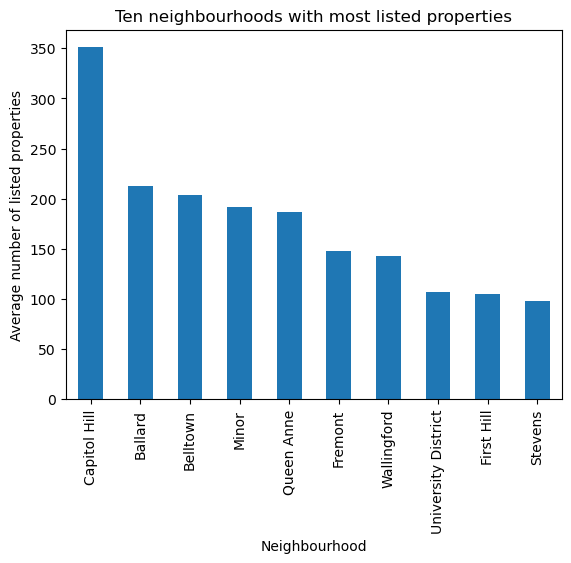

In [65]:
neighbourhood_with_most_properties = listings_selected_columns_df.groupby('neighbourhood').count()['id'].nlargest(10).plot(kind = "bar")
plt.xlabel("Neighbourhood")
plt.ylabel("Average number of listed properties")
plt.title("Ten neighbourhoods with most listed properties")

Now let's look at the most expensive neighbourhoods, considering the average price accross properties listed for each of then

Text(0.5, 1.0, 'Ten most expensive neighbourhoods')

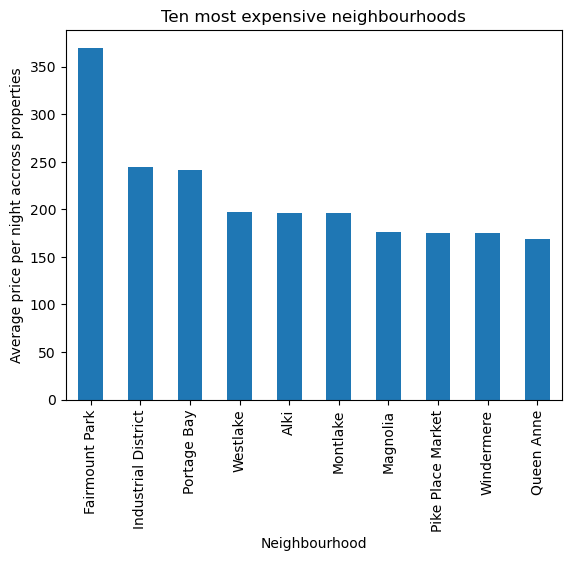

In [66]:
most_expensive_neighbourhoods = listings_selected_columns_df.groupby('neighbourhood')['price'].mean().nlargest(10).plot(kind = "bar")
plt.xlabel("Neighbourhood")
plt.ylabel("Average price per night accross properties")
plt.title("Ten most expensive neighbourhoods")

An interesting variable to look at is the price/guest, as it mmight be a good normalized indicator of how expensive the property will actually be when travelling in groups. We calcualte this variable based on the total price and the guests included. Let's see how this variable looks like

In [67]:
listings_selected_columns_df = listings_selected_columns_df[listings_selected_columns_df["guests_included"] >=1]
listings_selected_columns_df["price_per_guest"] = listings_selected_columns_df["price"] / listings_selected_columns_df["guests_included"]
print(listings_selected_columns_df["price_per_guest"])

0        42.500000
1       150.000000
2        97.500000
3       100.000000
4        75.000000
           ...    
3813    359.000000
3814     26.333333
3815     46.500000
3816     99.000000
3817     87.000000
Name: price_per_guest, Length: 3726, dtype: float64


When looking at this variable instead to determine the most expensive properties, we see some similarities with the previous analysis. Although there are some differences in the order, there is an overlap for most of the neighbourhoods that are most expensive. However, Fairmount Park, which was the most expensive according to the analysis based on price, is not included when considering price per guest. 

When looking at properties in Fairmount Park, we can see that there is only one that accommodates 8 guests, and therefore this average is not representative. We could also select neighbourhoods that include a certain numer of listed properties

In [68]:
listings_selected_columns_df[listings_selected_columns_df["neighbourhood"] == "Fairmount Park"][["price","guests_included"]]

,price,guests_included
1863,370.0,8


Text(0.5, 1.0, 'Ten most expensive neighbourhoods')

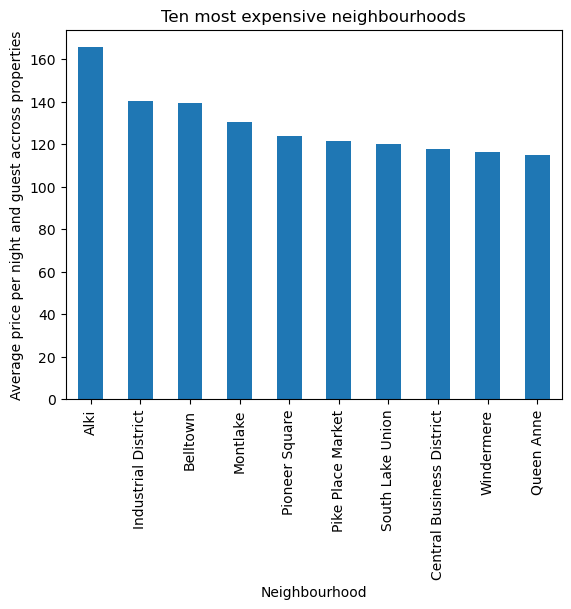

In [69]:
most_expensive_neighbourhoods_per_guest = listings_selected_columns_df.groupby('neighbourhood')['price_per_guest'].mean().nlargest(10).plot(kind = "bar")
plt.xlabel("Neighbourhood")
plt.ylabel("Average price per night and guest accross properties")
plt.title("Ten most expensive neighbourhoods")

We can also do a visual assessment on the map of the price per guest for properties

In [70]:

fig = px.scatter_mapbox(listings_selected_columns_df, lat="latitude", lon="longitude", hover_name="neighbourhood", hover_data=["price", "guests_included"],
                        color="price", size="guests_included", zoom = 3, height=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**`5.` What's the difference in price between travelling solo vs. in small/big groups?**

To investigate this we'll continue looking at the `listings` dataset, and visualize the price per guest variable vs. the number of guests

In [ ]:
sns.lineplot(x = "guests_included", y = "price_per_guest", data = listings_selected_columns_df)
plt.xlabel("Number of guests")
plt.ylabel("Price per guest($)")
plt.title("Price per guest vs. number of guests")

We can see that the price per guest is larger when travelling solo, and decreases progressively with the number of guests

**`6.` Which factors seem to be related to property price?**

We start by selecting a subset of numerical variables that could be relevant, and calculating the correlation matrix

In [72]:
ANALYSIS_VARIABLES = ['latitude', 'longitude',
       'bathrooms', 'bedrooms',
       'beds','square_feet', 'price', 'guests_included',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value',
       'price_per_guest']

listings_analysis_variables_df = listings_selected_columns_df[ANALYSIS_VARIABLES]
corr_df = listings_analysis_variables_df.corr()

In [73]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = corr_df.columns,
        y = corr_df.index,
        z = np.array(corr_df),
        text=corr_df.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

The correlation matrix show that several variables have a correlation coefficient > 0.4 with price. These variables are: bathrooms, bedrooms, beds, square_feet and guests included. Intuitively, it seems reasonable that these variables are correlated with price. The analysis did not reveal any unexpected correlations. Also, interestingly, location (latitude and/or longitude) did not correlate with price